In [1]:
import pandas as pd 
dataset = pd.read_csv('./archive/flat-prices.csv')

In [2]:
dataset


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [4]:
data = pd.get_dummies(dataset)

In [10]:
dataset.month.unique()
data.drop(['flat_type_1 ROOM', 'block_309', 'street_name_YISHUN CTRL', 'storey_range_10 TO 12', 'flat_model_IMPROVED'], axis=1)

,floor_area_sqm,lease_commence_date,resale_price,month_1990-01,month_1990-02,month_1990-03,month_1990-04,month_1990-05,month_1990-06,month_1990-07,...,flat_model_IMPROVED-MAISONETTE,flat_model_MAISONETTE,flat_model_MODEL A,flat_model_MODEL A-MAISONETTE,flat_model_MULTI GENERATION,flat_model_NEW GENERATION,flat_model_PREMIUM APARTMENT,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_TERRACE
0,31.0,1977,9000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,1977,6000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31.0,1977,8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,1977,6000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73.0,1976,47200,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287191,142.0,1987,456000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287192,142.0,1988,408000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287193,146.0,1988,469000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
287194,146.0,1988,440000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
y = data.resale_price
x = data.drop('resale_price', axis=1)

array([[<AxesSubplot:title={'center':'floor_area_sqm'}>,
        <AxesSubplot:title={'center':'lease_commence_date'}>],
       [<AxesSubplot:title={'center':'resale_price'}>, <AxesSubplot:>]],
      dtype=object)

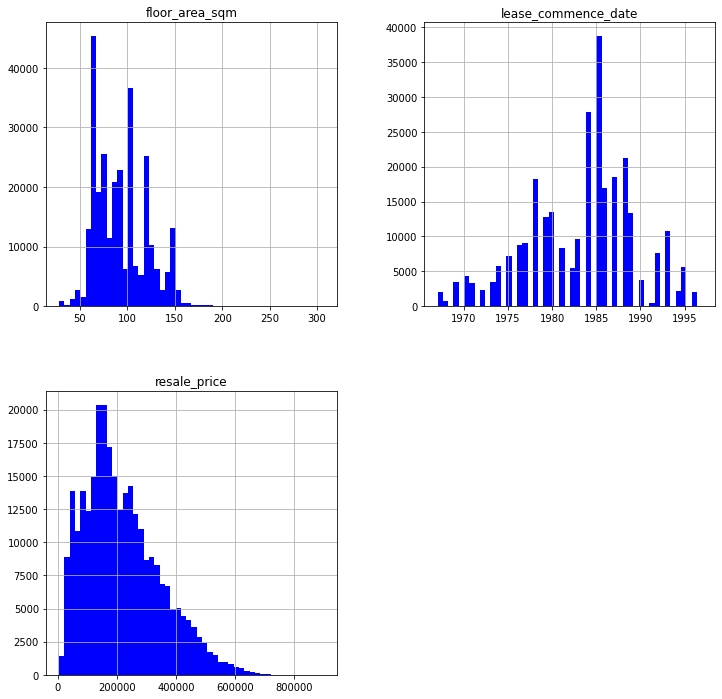

In [16]:
dataset.hist(figsize=(12, 12), color='b', bins=50)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
y_preds = lr.predict(x_test)

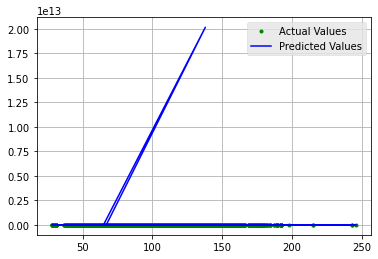

In [12]:
import matplotlib.pyplot as plt 
plt.plot(x_test.floor_area_sqm, y_test.values, '.g', label="Actual Values")
plt.plot(x_test.floor_area_sqm, lr.predict(x_test), '-b', label="Predicted Values")
plt.style.use('ggplot')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
lr.score(x_train, y_train)

0.9457246293982056

In [ ]:
reg = LinearRegression()
reg.fit(x_test, y_test)

In [ ]:
reg.score(x_test, y_test)

In [ ]:
x_train